# MAT281 - Laboratorio 9

## Aplicaciones de la Matemática en la Ingeniería

In [1]:
# Configuración para plots inline
%matplotlib inline

## __Intrucciones__

* Completa tus datos personales (nombre y rol USM).
* Debes enviar este .ipynb con el siguiente formato de nombre: 08_lab_clasificacion_NOMBRE_APELLIDO.ipynb con tus respuestas a alonso.ogueda@gmail.com y sebastian.flores@usm.cl .
* Se evaluará:
    - Soluciones
    - Código
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.
    - La escala es de 0 a 4 considerando solo valores enteros.
* __La entrega es al final de esta clase.__

__Nombre__: Quentin Carbonnelle

__Rol__: 201990422-1

## Observación

***Este laboratorio utiliza la librería sklearn (oficialmente llamada [scikit learn](http://scikit-learn.org/stable/)), puesto que buscamos aplicar la técnica del clustering a datos tal como se haría en una aplicación real. El código a proveer en este laboratorio es reducido, y la nota se basará mayoritariamente en la calidad de las respuestas entregadas en los comentarios.***

## Problema: Wine Dataset

Los datos del [Wine Dataset](https://archive.ics.uci.edu/ml/datasets/Wine) son un conjunto de datos clásicos para verificar los algoritmos de clustering. 

<img src="images/wine.jpg" alt="" width="600px" align="middle"/>

Los datos corresponden a 3 cultivos diferentes de vinos de la misma región de Italia, y que han sido identificados con las etiquetas 1, 2 y 3. Para cada tipo de vino han sido realizados 13 análisis químicos:

1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 


La base de datos contiene 178 muestras distintas en total.

## 0. Entendimiento del dataset
Antes de leer los datos y aplicar algoritmos, resulta importante comprender la naturaleza de los datos. Los datos del wine dataset ya se encuentan en la carpeta `data/`. 

Existen 2 archivos de interés:
* `wine_data.txt` : Datos de interés.
* `wine_names.txt` : Explicación de los datos.

Lea atentamente el archivo `wine_names.txt` y responda las preguntas.

In [2]:
%%bash
cat data/wine_names.txt

Couldn't find program: 'bash'


## Pregunta 1.1
¿Que contiene el archivo? Describa su contenido de manera que una tercera persona, que no ha visto la descripción, pueda entenderlo.

*R:* It is a dataset of chemical analysis of wine from 3 cultivars. The data has 13 attributes with no missing values and the classes are separable which means a  that a 100% correct classifier is possible. It is thus a good dataset to compare models.

## Pregunta 1.2
¿**Porqué** y **cómo** podemos usar este dataset para probar algoritmos de clustering cuando los datos han sido usados para algoritmos de clasificación?

*R:* 


## 1. Lectura de datos

Antes de proceder, miremos algunas lineas del archivo a utilizar.

In [3]:
%%bash
head data/wine_data.txt

Couldn't find program: 'bash'


El siguiente código permite leer los datos desde el archivo `data/wine_data.txt` y cargarlos en un dataframe. 

In [4]:
import pandas as pd
import os

names = ["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols",
         "flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity",
         "hue", "OD280/OD315", "proline"]
columns = ["wine_class"] + names
filename = os.path.join("data","wine_data.txt")
df = pd.read_csv(filename, names=columns, sep=",")
df.head()

,wine_class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Pregunta 2
Complete la preparación de los datos, separando los datos en un dataframe `X` (datos a utilizar para clustering) y una serie `true_labels` (etiquetas verdaderas para cada dato de `X`).


**OBSERVACION**: La serie `true_labels` debe modificarse para que sean 0, 1 y 2 (en vez de 1, 2 y 3 como vienen en el archivo), porque el algoritmo de clustering asume que las categorías se numeran desde 0.

In [5]:
import numpy as np

# Seleccionar X
X = df.loc[:, df.columns != 'wine_class']

# Seleccionar true_labels
true_labels = df.loc[:, df.columns =='wine_class']

In [6]:
# Check X
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
# Check true_labels
true_labels.head()

,wine_class
0,1
1,1
2,1
3,1
4,1


### Pregunta 3
Utilizando la serie `true_labels` definido anteriormente, complete el código para conocer cuántas muestras son de tipo 0, de tipo 1 y de tipo 2. Compare con lo indicado en el archivo.

In [8]:
# Es muy util saber contar valores en una serie de pandas.
# Porque permite responder esta pregunta con 1 linea
vc = true_labels.wine_class.value_counts()

print(vc)

2    71
1    59
3    48
Name: wine_class, dtype: int64


## 2. Exploración de valores

Antes de realizar el clustering, deseamos revisar los datos. El siguiente código permite conocer la distribución de las mediciones para las muestras. 

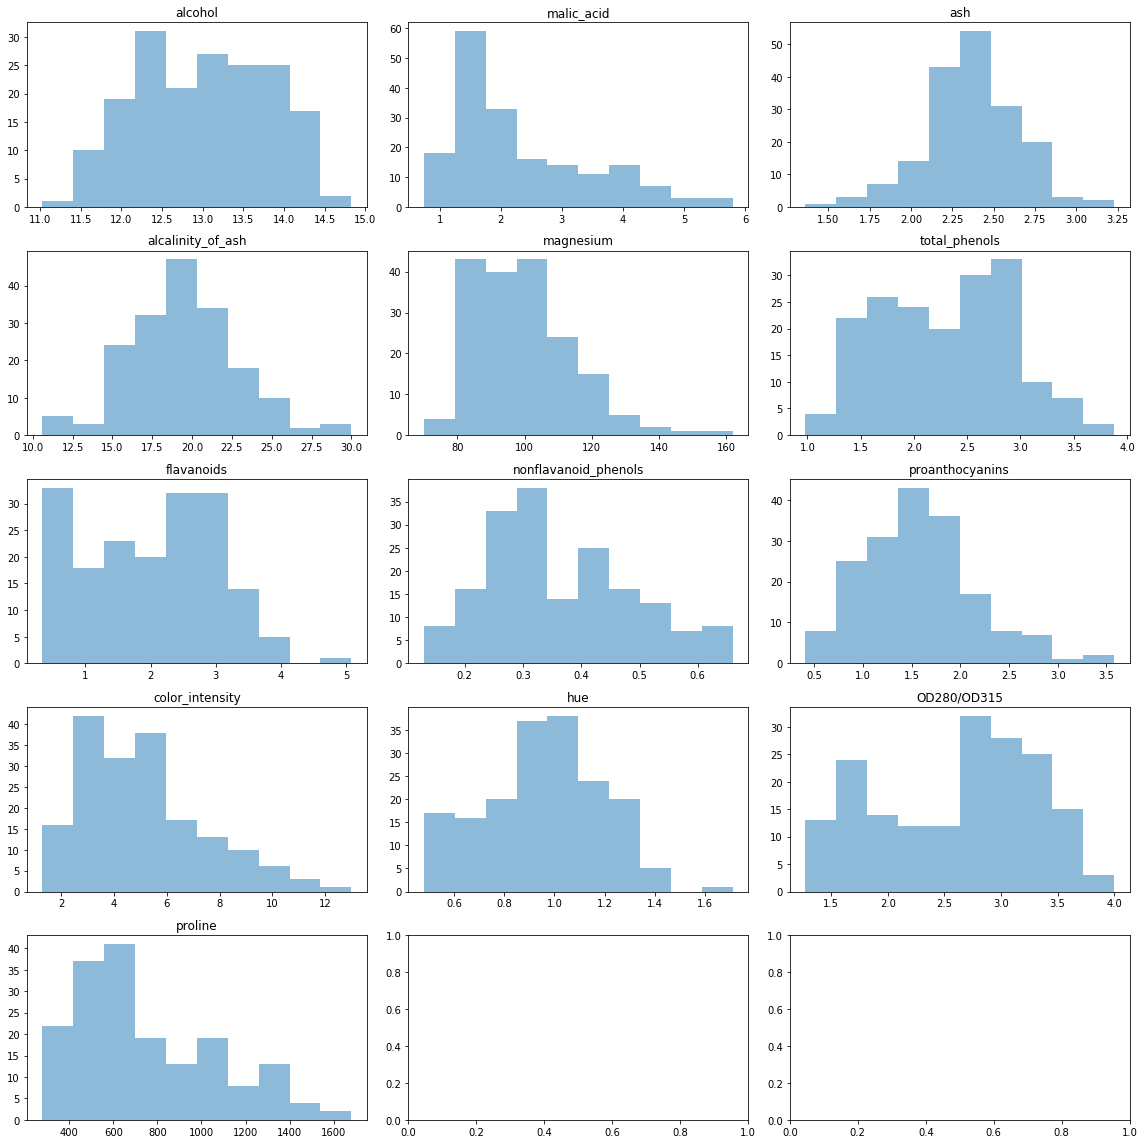

In [9]:
from matplotlib import pyplot as plt
rows, cols = 5, 3
fig1, axes1 = plt.subplots(rows, cols, figsize=(16,16))
for i in range(rows):
    for  j in range(cols):
        n = i*cols + j
        if n<13:
            ax = axes1[i][j]
            col_name = names[n]
            ax.hist(X[col_name], alpha=0.50)
            ax.set_title(col_name)
fig1.tight_layout()
plt.show()

O, aprovechando las ventajas de usar la librería pandas, 
podemos utilizar los métodos nativos para obtener el mismo resultado con mucho menor esfuerzo.

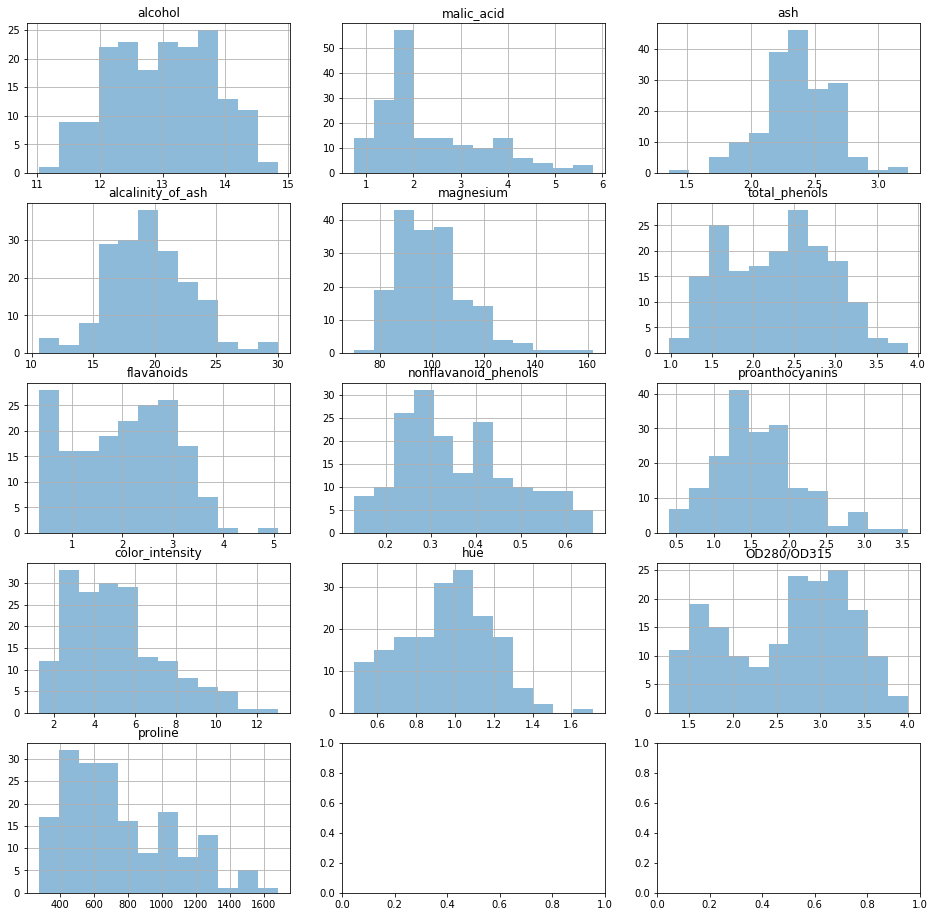

In [10]:
from matplotlib import pyplot as plt
rows, cols = 5, 3
fig2, axes2 = plt.subplots(rows, cols, figsize=(16,16))
for n, col_name in enumerate(names):
    ax = axes2[n//cols][n%cols]
    df[col_name].hist(bins=12, alpha=0.50, ax=ax)
    ax.set_title(col_name)
plt.show()

O, incluso como no son demasiadas variables, podemos graficar todas las relaciones con scatter_matrix.

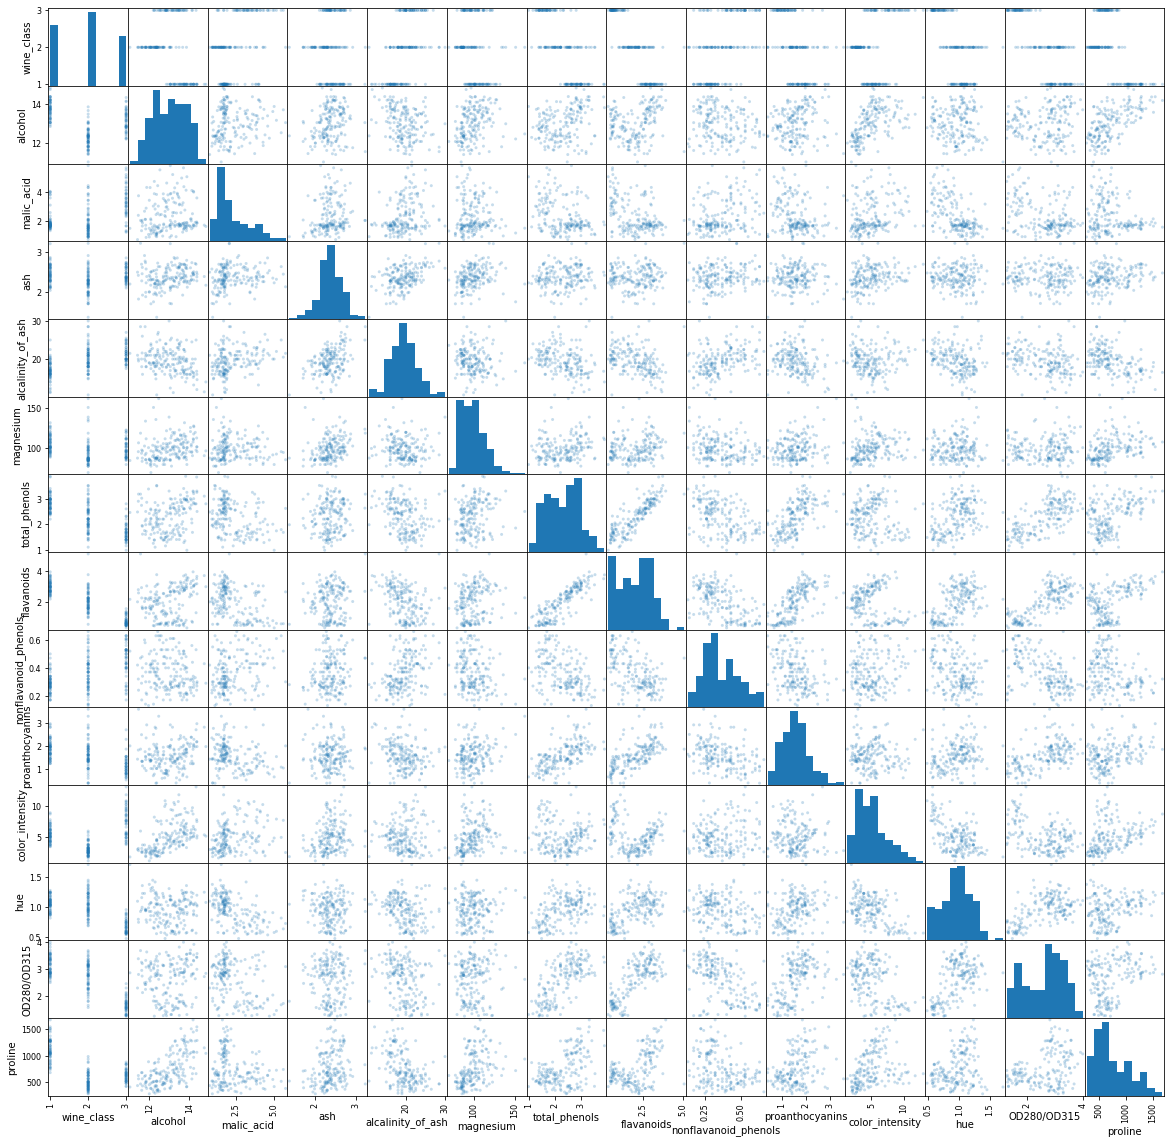

In [11]:
# Paciencia - tomará 30 segundos.
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.25, figsize=(20, 20), diagonal='hist');

## Pregunta 4

En base a la exploración de valores, usted:
1. Aplicaría el algoritmo de clustering directamente.
2. Realizaría algún tipo de normalización a los datos, y luego aplicar el algoritmo de clustering.

¿Que resulta más razonable, opción 1 u opción 2? ¿Porqué?

**Justifique su respuesta**: piense en cómo funciona K-Means.

#### Respuesta

*R:* Option 2 is better. K-means here works with euclidian distances and we can see that the scale of proline is way bigger than the one of malic_acid. The influence of proline on the final result will thus be way bigger than it should 


## 3. Clustering Directo

A continuación se provee el código para realizar el clustering de los datos de manera directa (sin normalizar). Recuerde que el algoritmo hará predicción de clusters y no de etiquetas, por lo que la matriz de confusión no necesariamente será diagonal. Para la interpretación de la matriz de confusión, considere la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0  0  0  0]
 [13 46  0  0]
 [20  1 50  0]
 [29  0 19  0]]


## Pregunta 5

Ejecute el código anterior y comente los resultados. ¿Permite el clustering recobrar el agrupamiento natural de los datos? ¿Si no, porqué?

#### Respuesta

*R:* No, if it was the case there would only be one number on each row and column.



## 3. Normalización de los datos

Sabemos que los algoritmos suelen funcionar mejor con los datos normalizados, como se explicó en la clase de Regresión Lineal. Note que en el caso de los algoritmos de clustering, sólo es necesario normalizar la matrix `X`, ¡las etiquetas no necesitan normalizarse!

## Pregunta 6.1
Normalice los datos utilizando para obtener una nueva matriz `X_normalized_1`, cuyas columnas tengan sus datos en el rango [0,1]. 

**Observación**: Utilice sus conocimientos matemáticos y opere normalmente con `X.max()` y `X.min()`. La respuesta toma 1 línea.

In [13]:
X_normalized_1 = (X-X.min())/(X.max()-X.min())

In [14]:
# Check facil con el método describe
X_normalized_1.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,0.518584,0.213639,0.0,0.350658,0.531579,0.696711,1.0
malic_acid,178.0,0.315484,0.220780,0.0,0.170455,0.222332,0.462945,1.0
ash,178.0,0.538244,0.146708,0.0,0.454545,0.534759,0.640374,1.0
alcalinity_of_ash,178.0,0.458502,0.172142,0.0,0.340206,0.458763,0.561856,1.0
magnesium,178.0,0.323278,0.155244,0.0,0.195652,0.304348,0.402174,1.0
total_phenols,178.0,0.453487,0.215811,0.0,0.262931,0.474138,0.627586,1.0
flavanoids,178.0,0.356386,0.210730,0.0,0.182489,0.378692,0.534810,1.0
nonflavanoid_phenols,178.0,0.437460,0.234818,0.0,0.264151,0.396226,0.580189,1.0
proanthocyanins,178.0,0.372523,0.180555,0.0,0.264984,0.361199,0.485804,1.0
color_intensity,178.0,0.322363,0.197806,0.0,0.165529,0.290956,0.419795,1.0


### Pregunta 6.2 
Reutilice el código anteriormente provisto para realizar el clustering en los datos normalizados y comente los resultados obtenidos. ¿Cuantos errores existen en total?

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X_normalized_1)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0  0  0  0]
 [59  0  0  0]
 [ 2  7 62  0]
 [ 0 48  0  0]]


Comentario a los resultados obtenidos.

*R:* (The answer was already here, except in my case it was there was 9 errors for etiqueta 2

La clasificación es perfecta para la etiquetas originales 1 y 3 (0 y 2 después de re-etiquetar). Se obtiene una clasificación  con 8 errores del total de 71 para la etiqueta 2 (1 depués de re-etiquetar). La normalización mejora muchísimo el desempeño del algoritmo de clustering.  

## Nueva normalización de datos

Como usted ya posee cierta experiencia en ajustar modelos, se pregunta si resultará mejor normalizar considerando ahora que cada columna posea media $0$ y desviación estándar $1$ para cada una de sus columnas.

### Pregunta 7.1 
Estandarice los datos para obtener una nueva matriz `X_normalized_2`, de manera que `X_normalized_2` posea media 0 y desviación estándar 1 para cada una de sus columnas. 

In [16]:
X_normalized_2 = (X-X.mean())/X.std()

In [17]:
# Check facil con método describe
X_normalized_2.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.863872e-15,1.0,-2.427388,-0.786027,0.060828,0.833777,2.253415
malic_acid,178.0,3.193450e-16,1.0,-1.428952,-0.656896,-0.421922,0.667909,3.100446
ash,178.0,-4.065412e-15,1.0,-3.668813,-0.570513,-0.023754,0.696145,3.147447
alcalinity_of_ash,178.0,-7.983626e-17,1.0,-2.663505,-0.687199,0.001514,0.600395,3.145637
magnesium,178.0,1.995907e-17,1.0,-2.082381,-0.822096,-0.121938,0.508205,4.359076
total_phenols,178.0,0.000000e+00,1.0,-2.101318,-0.882977,0.095690,0.806722,2.532372
flavanoids,178.0,9.580351e-16,1.0,-1.691200,-0.825211,0.105851,0.846697,3.054216
nonflavanoid_phenols,178.0,-5.588538e-16,1.0,-1.862979,-0.738059,-0.175599,0.607827,2.395645
proanthocyanins,178.0,-1.676562e-15,1.0,-2.063214,-0.595603,-0.062721,0.627406,3.475269
color_intensity,178.0,-3.343143e-16,1.0,-1.629691,-0.792866,-0.158777,0.492567,3.425768


### Pregunta 7.2
Reutilice el código anteriormente provisto para realizar el clustering en los datos estandarizados y comente los resultados obtenidos. ¿Cuantos errores existen en total?

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

# Parameters
n_clusters = 3

# Running the algorithm
kmeans = KMeans(n_clusters)
kmeans.fit(X_normalized_2)
pred_labels = kmeans.labels_

cm = confusion_matrix(true_labels, pred_labels)
print(cm)

[[ 0  0  0  0]
 [59  0  0  0]
 [ 3 65  3  0]
 [ 0  0 48  0]]


Comentario a los resultados obtenidos.

*R:* It is even better than before. The first and third type have again with no errors and only 6 errors for the second type, instead of the 9 errors we had with the previous normalization

### Pregunta 8

¿Cuál de las 3 versiones aplicadas de clustering funcionó mejor? ¿Porqué cree que sea así?

*R:* The last one is the best. Because we lose less information and it is less sensitive to outliers.


## Bonus Track: Regla del codo
En todos los casos hemos utilizado que el número de clusters es igual a 3. El ajuste del modelo siempre será mejor al aumentar el número de clusters, pero ello no significa que el número de clusters sea el apropiado. De hecho, si tenemos que ajustar $n$ puntos, claramente tomar $n$ clusters generaría un ajuste perfecto, pero no permitiría representar si existen realmente agrupaciones de datos.

Cuando no se conoce el número de clusters a priori, se utiliza la [regla del codo](https://jarroba.com/seleccion-del-numero-optimo-clusters/), que indica que el número más apropiado es aquel donde "cambia la pendiente" de decrecimiento de la la suma de las distancias a los clusters para cada punto, en función del número de clusters.

A continuación se provee el código para el caso de clustering sobre los datos estandarizados, leídos directamente de un archivo preparado especialmente.


In [19]:
from sklearn.cluster import KMeans

X_mod = np.loadtxt("data/X_estandarized.txt")

clusters = range(1,20)
total_distance = []
for n_clusters in clusters:
    kmeans = KMeans(n_clusters)
    kmeans.fit(X_mod)
    pred_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    # Get the distances
    distance_for_n = 0
    for k in range(n_clusters):
        points = X_mod[pred_labels==k]
        aux = (points - centroids[k,:])**2
        distance_for_n += (aux.sum(axis=1)**0.5).sum()
    total_distance.append(distance_for_n)

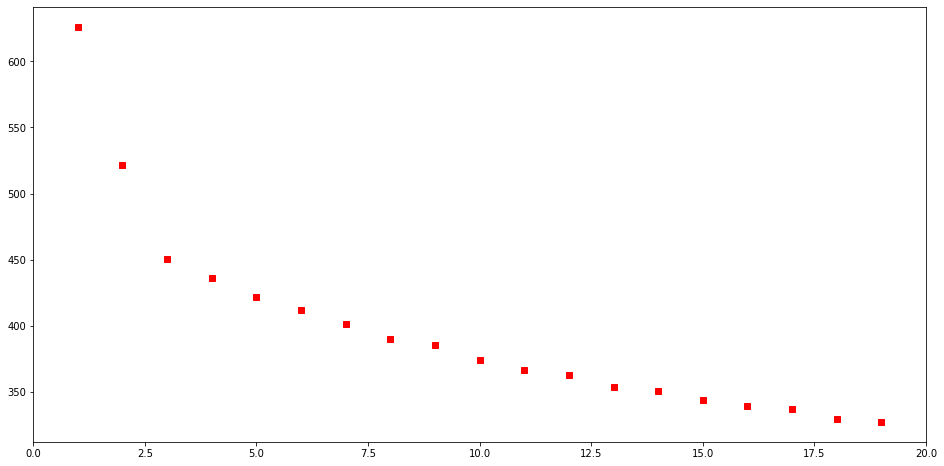

In [20]:
fig = plt.figure(figsize=(16,8))
plt.plot(clusters, total_distance, 'rs')
plt.xlim(min(clusters)-1, max(clusters)+1)
plt.show()